colab button here

In [1]:
# ------------------------------------------------------------------
# Setup Cell: Run this first to install required libraries.
# ------------------------------------------------------------------
# The '!' command runs a shell command. We use it to call pip.
# The '-q' flag makes the output "quiet" to keep the notebook clean.

!pip install -q yfinance pandas matplotlib-venn numpy

print("✅ Setup complete. You can now run the rest of the notebook.")

✅ Setup complete. You can now run the rest of the notebook.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [17]:
data = yf.download('SPY', start='2022-01-01')
data.columns = data.columns.droplevel(1)
data

C:\Users\Evan Schreiner\AppData\Local\Temp\ipykernel_31184\1240473377.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('SPY', start='2022-01-01')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Date,,,,,
2022-01-03,454.466858,454.600060,450.794681,453.125458,72668200
2022-01-04,454.314636,456.626426,452.440486,455.903395,71178700
2022-01-05,445.590851,454.723766,445.495711,453.943656,104538900
2022-01-06,445.172241,447.912119,442.784357,445.124686,86858900
2022-01-07,443.412323,446.371021,442.042384,445.181840,85111600
...,...,...,...,...,...
2025-09-11,657.630005,658.330017,653.590027,654.179993,69934400
2025-09-12,657.409973,659.109985,656.900024,657.599976,72780100
2025-09-15,660.909973,661.039978,659.340027,659.640015,63772400


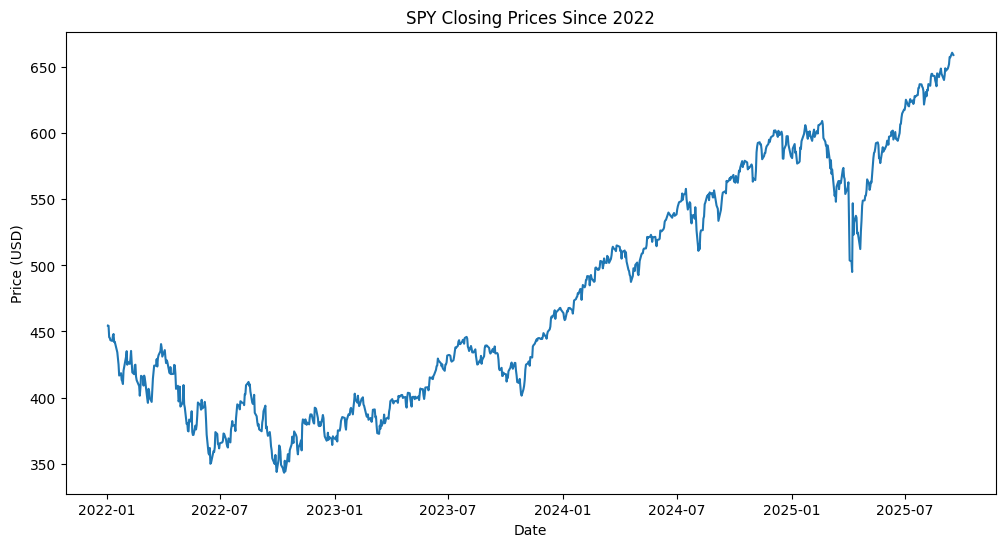

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='SPY Close Price')
plt.title('SPY Closing Prices Since 2022')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.show()

In [19]:
data['SMA50'] = data['Close'].rolling(window=50).mean()
data

Price,Close,High,Low,Open,Volume,SMA50
Date,,,,,,
2022-01-03,454.466858,454.600060,450.794681,453.125458,72668200,NaN
2022-01-04,454.314636,456.626426,452.440486,455.903395,71178700,NaN
2022-01-05,445.590851,454.723766,445.495711,453.943656,104538900,NaN
2022-01-06,445.172241,447.912119,442.784357,445.124686,86858900,NaN
2022-01-07,443.412323,446.371021,442.042384,445.181840,85111600,NaN
...,...,...,...,...,...,...
2025-09-11,657.630005,658.330017,653.590027,654.179993,69934400,636.076799
2025-09-12,657.409973,659.109985,656.900024,657.599976,72780100,636.815999
2025-09-15,660.909973,661.039978,659.340027,659.640015,63772400,637.527397


In [21]:
data['Position'] = np.where(data['Close'] > data['SMA50'], 1, 0)
data

Price,Close,High,Low,Open,Volume,SMA50,Position
Date,,,,,,,
2022-01-03,454.466858,454.600060,450.794681,453.125458,72668200,NaN,0
2022-01-04,454.314636,456.626426,452.440486,455.903395,71178700,NaN,0
2022-01-05,445.590851,454.723766,445.495711,453.943656,104538900,NaN,0
2022-01-06,445.172241,447.912119,442.784357,445.124686,86858900,NaN,0
2022-01-07,443.412323,446.371021,442.042384,445.181840,85111600,NaN,0
...,...,...,...,...,...,...,...
2025-09-11,657.630005,658.330017,653.590027,654.179993,69934400,636.076799,1
2025-09-12,657.409973,659.109985,656.900024,657.599976,72780100,636.815999,1
2025-09-15,660.909973,661.039978,659.340027,659.640015,63772400,637.527397,1


In [24]:
data['Signal'] = data['Position'].diff()
data[data['Signal'] != 0].head()

Price,Close,High,Low,Open,Volume,SMA50,Position,Signal
Date,,,,,,,,
2022-01-03,454.466858,454.600060,450.794681,453.125458,72668200,NaN,0,NaN
2022-03-18,424.205505,424.529964,417.239126,417.983479,106345500,420.718909,1,1.0
2022-04-11,419.815796,424.663629,419.310018,423.814287,89770500,420.553110,0,-1.0
2022-04-13,423.050842,423.814271,417.830819,418.012138,74070400,420.200709,1,1.0
2022-04-14,417.783081,424.405927,417.678093,423.279830,97869500,419.854418,0,-1.0


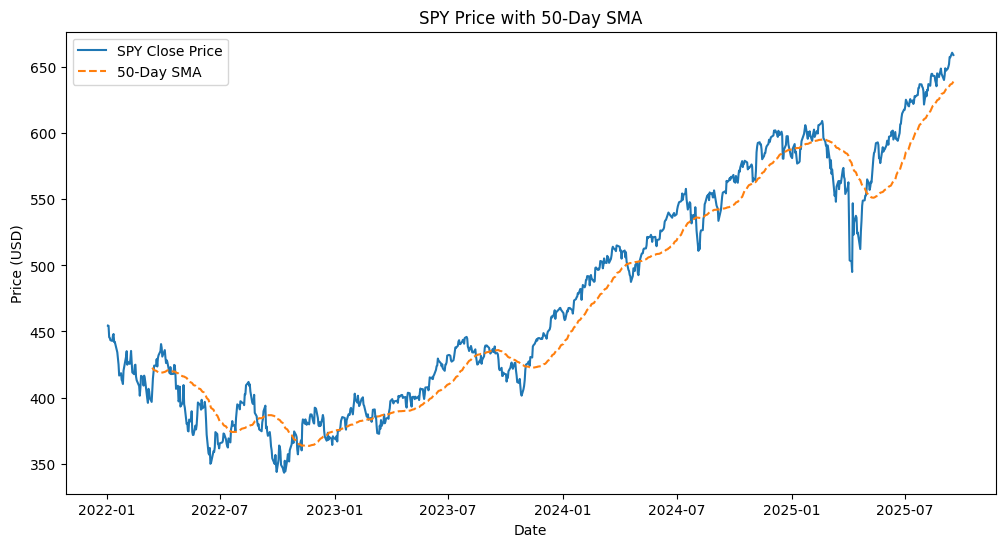

In [25]:
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='SPY Close Price')
plt.plot(data['SMA50'], label='50-Day SMA', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('SPY Price with 50-Day SMA')
plt.legend()
plt.show()